In [180]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import re
import string
import nltk
import skmultilearn

import numpy.random as npr

from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report





In [155]:
from IPython.display import Markdown, display

In [181]:
data_path = "/Users/sakthivel/lexisnexis/lexisnexis.csv"

In [182]:
data_all= pd.read_csv(data_path)

In [183]:
data_all.shape



(1199, 5)

In [184]:
print("Number of rows in data =",data_all.shape[0])
print("Number of columns in data =",data_all.shape[1])
print("\n")

data_all.head()

Number of rows in data = 1199
Number of columns in data = 5




,filename,citation id,class,tocase,text
0,06_1.xml,c0,cited,Universal Music Australia Pty Ltd v Sharman Li...,2 Wilcox J delivered judgment on the complex i...
1,06_1.xml,c1,cited,Universal Music Australia Pty Ltd v Sharman Li...,2 Wilcox J delivered judgment on the complex i...
2,06_1.xml,c2,cited,Universal Music Australia Pty Ltd v Sharman Li...,2 Wilcox J delivered judgment on the complex i...
3,06_1.xml,c3,cited,Sharman License Holdings Ltd v Universal Music...,2 Wilcox J delivered judgment on the complex i...
4,06_1.xml,c4,cited,Sharman License Holdings Ltd v Universal Music...,2 Wilcox J delivered judgment on the complex i...


In [185]:
# available initial citation class in the data
categories=list(data_all['class'].unique())
print(categories)


['cited', 'discussed', 'applied', 'considered', 'referred_to', 'distinguished', 'quoted', 'followed', 'explained', 'reversed', 'affirmed', 'notfollowed', 'related', 'compared', 'approved']


In [30]:

data_all['class'].value_counts()

cited            584
referred_to      231
applied          138
followed          93
discussed         63
considered        50
distinguished     20
approved           5
quoted             4
explained          3
notfollowed        3
related            2
affirmed           1
compared           1
reversed           1
Name: class, dtype: int64

In [11]:
data_all['class'].value_counts()

cited            584
referred_to      231
applied          138
followed          93
discussed         63
considered        50
distinguished     20
approved           5
quoted             4
explained          3
notfollowed        3
related            2
affirmed           1
compared           1
reversed           1
Name: class, dtype: int64

In [159]:
# filter out the dataframe with only needed four citation class
subsetDataFrame = data_all[data_all['class'].isin(['cited', 'referred_to','applied','followed'])]

In [160]:
# convert the values in the column to column header for classification
dummy=pd.get_dummies(subsetDataFrame['class'])

In [186]:
new_dataframe=pd.concat([subsetDataFrame,dummy],axis=1)
new_dataframe.head()

,filename,citation id,class,tocase,text,applied,cited,followed,referred_to
0,06_1.xml,c0,cited,Universal Music Australia Pty Ltd v Sharman Li...,2 Wilcox J delivered judgment on the complex i...,0,1,0,0
1,06_1.xml,c1,cited,Universal Music Australia Pty Ltd v Sharman Li...,2 Wilcox J delivered judgment on the complex i...,0,1,0,0
2,06_1.xml,c2,cited,Universal Music Australia Pty Ltd v Sharman Li...,2 Wilcox J delivered judgment on the complex i...,0,1,0,0
3,06_1.xml,c3,cited,Sharman License Holdings Ltd v Universal Music...,2 Wilcox J delivered judgment on the complex i...,0,1,0,0
4,06_1.xml,c4,cited,Sharman License Holdings Ltd v Universal Music...,2 Wilcox J delivered judgment on the complex i...,0,1,0,0


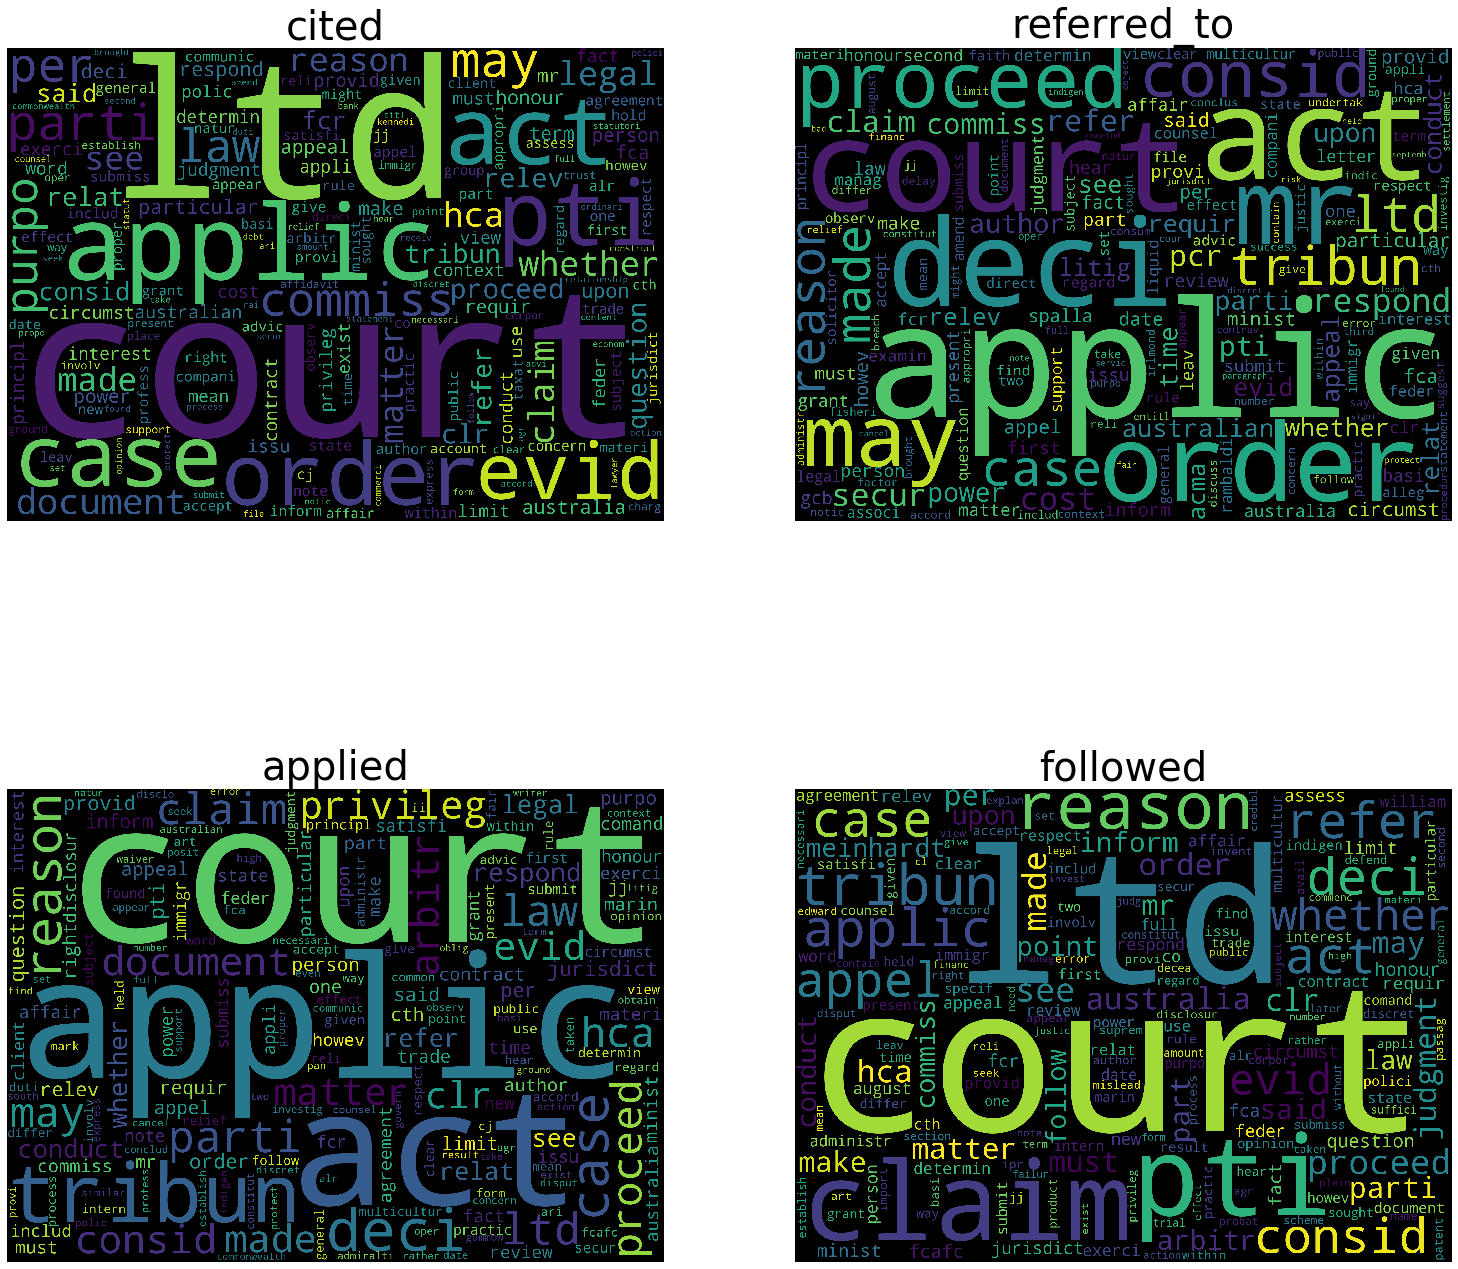

In [132]:
#### wordcloud for analyzing the most prominent words in each of the citation class
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# cited
subset = new_dataframe[new_dataframe.cited==1]
text = subset.text.values
cloud_cited = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("cited",fontsize=40)
plt.imshow(cloud_cited)


# referred to
subset = new_dataframe[new_dataframe.referred_to==1]
text = subset.text.values
cloud_referred_to = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("referred_to",fontsize=40)
plt.imshow(cloud_referred_to)




# applied
subset = new_dataframe[new_dataframe.applied==1]
text = subset.text.values
cloud_applied = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("applied",fontsize=40)
plt.imshow(cloud_applied)


# followed
subset = new_dataframe[new_dataframe.followed==1]
text = subset.text.values
cloud_followed = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("followed",fontsize=40)
plt.imshow(cloud_followed)






#### DATA PREPROCESSING

In [187]:
stop_words = set(stopwords.words('english'))

re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

# stopword removal
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

stemmer = SnowballStemmer("english")

# stemming 
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence



In [188]:

new_dataframe['text'] = new_dataframe['text'].str.lower()
new_dataframe['text']  = new_dataframe['text'].apply(cleanPunc)
new_dataframe['text']  = new_dataframe['text'].apply(removeStopWords)
new_dataframe['text']  = new_dataframe['text'].apply(stemming)
new_dataframe['text']

0       2 wilcox j deliv judgment complex issu liabil ...
1       2 wilcox j deliv judgment complex issu liabil ...
2       2 wilcox j deliv judgment complex issu liabil ...
3       2 wilcox j deliv judgment complex issu liabil ...
4       2 wilcox j deliv judgment complex issu liabil ...
5       6 section 241a feder court australia act 1976 ...
6       6 section 241a feder court australia act 1976 ...
7       7 least reason court held number occas typic p...
10      12 primari submiss made music compani leav app...
11      19 thus den norsk bank asa v antonato 1999 qb ...
12      19 thus den norsk bank asa v antonato 1999 qb ...
16      27 read honour reason far satisfi natur extent...
17      recent lindgren j caus consid oper 15 r 23 aus...
18      term possess custodi power 15 repres three alt...
19      question administr agent compani appoint 437b ...
20      seem doubt result 1999 amend 15 r 2 criteria 1...
21      term possess custodi power 15 repres three alt...
22      notwit

In [163]:
##view the dataframe
new_dataframe

,filename,citation id,class,tocase,text,applied,cited,followed,referred_to
0,06_1.xml,c0,cited,Universal Music Australia Pty Ltd v Sharman Li...,2 wilcox j deliv judgment complex issu liabil ...,0,1,0,0
1,06_1.xml,c1,cited,Universal Music Australia Pty Ltd v Sharman Li...,2 wilcox j deliv judgment complex issu liabil ...,0,1,0,0
2,06_1.xml,c2,cited,Universal Music Australia Pty Ltd v Sharman Li...,2 wilcox j deliv judgment complex issu liabil ...,0,1,0,0
3,06_1.xml,c3,cited,Sharman License Holdings Ltd v Universal Music...,2 wilcox j deliv judgment complex issu liabil ...,0,1,0,0
4,06_1.xml,c4,cited,Sharman License Holdings Ltd v Universal Music...,2 wilcox j deliv judgment complex issu liabil ...,0,1,0,0
5,06_1.xml,c5,cited,Dcor Corporation Pty Ltd v Dart Industries Inc...,6 section 241a feder court australia act 1976 ...,0,1,0,0
6,06_1.xml,c6,cited,Bomanite Pty Ltd v Slatex Corp Australia Pty L...,6 section 241a feder court australia act 1976 ...,0,1,0,0
7,06_1.xml,c7,cited,Adam P Brown Male Fashions Proprietary Limited...,7 least reason court held number occas typic p...,0,1,0,0
10,06_1.xml,c10,cited,Gerlach v Clifton Bricks Pty Ltd [2002] HCA 22...,12 primari submiss made music compani leav app...,0,1,0,0
11,06_1.xml,c11,cited,Den Norske Bank ASA v Antonatos [1999] QB 271,19 thus den norsk bank asa v antonato 1999 qb ...,0,1,0,0


# Train and test data split

In [189]:
# split the 
from sklearn.model_selection import train_test_split

train, test = train_test_split(new_dataframe, random_state=42, test_size=0.25, shuffle=True)

print(train.shape)
print(test.shape)

(784, 9)
(262, 9)


In [190]:
train.columns


Index(['filename', 'citation id', 'class', 'tocase', 'text', 'applied',
       'cited', 'followed', 'referred_to'],
      dtype='object')

In [191]:
train_text = train['text']
test_text = test['text']

# Feature Engineering

# TF_IDF

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [193]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['filename', 'citation id', 'text', 'tocase','class'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['filename', 'citation id', 'text', 'tocase','class'], axis=1)

# Bag of words

In [172]:
from sklearn.feature_extraction.text import CountVectorizer
#vectorbw = CountVectorizer(stop_words ='english')
#vectorbw.fit(train_text)
#vectorbw.fit(test_text)

# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = 'english')

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(train_text)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(test_text)


In [167]:
x_trainbw = vectorbw.transform(train_text)
y_trainbw = train.drop(labels = ['filename', 'citation id', 'text', 'tocase','applied',
       'cited', 'followed', 'referred_to'], axis=1)

x_testbw = vectorizer.transform(test_text)
y_testbw = test.drop(labels = ['filename', 'citation id', 'text', 'tocase','applied',
       'cited', 'followed', 'referred_to'], axis=1)

# Multiple Binary Classification(One Vs Rest):


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [115]:
# list of categories in the model
categories=list(train['class'].unique())
print(categories)

['referred_to', 'cited', 'followed', 'applied']


In [148]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing referred_to comments...**
Test accuracy is 0.8282442748091603


**Processing cited comments...**
Test accuracy is 0.6870229007633588


**Processing followed comments...**
Test accuracy is 0.8969465648854962


**Processing applied comments...**
Test accuracy is 0.851145038167939


CPU times: user 30.9 ms, sys: 19.1 ms, total: 49.9 ms
Wall time: 1.34 s


# Multiple Binary classification (Binary Relevance):


In [123]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.6030534351145038


CPU times: user 5.26 s, sys: 3.08 s, total: 8.34 s
Wall time: 8.34 s


# classifier chains

In [124]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [125]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

/Users/sakthivel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sakthivel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sakthivel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sakthivel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy =  0.6259541984732825


CPU times: user 6.31 s, sys: 1.69 s, total: 8 s
Wall time: 5.49 s


In [126]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [127]:
classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

Accuracy =  0.5152671755725191




# Mutinomial Naive Baye's

In [194]:


x_train = vectorizer.transform(train_text)
y_trainnb = train.drop(labels = ['filename', 'citation id', 'text', 'tocase','applied',
       'cited', 'followed', 'referred_to'], axis=1)

x_test = vectorizer.transform(test_text)
y_testnb = test.drop(labels = ['filename', 'citation id', 'text', 'tocase','applied',
       'cited', 'followed', 'referred_to'], axis=1)

In [196]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_trainnb)


Y_test_pred = clf.predict(x_test)
sklearn_score_train = clf.score(x_train,y_trainnb)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(x_test,y_testnb)
print("Sklearn's score on testing data :",sklearn_score_test)





Sklearn's score on training data : 0.5969387755102041
Sklearn's score on testing data : 0.5801526717557252


/Users/sakthivel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
